### **Banking Analytics | Problem Statement: Increase the effectiveness of the bank's telemarketing campaign**

**Name: Vaishnavi Panchal**

**Dataset Source: kaggle**

**Email: vaishpanchal12@gmail.com**

##### **Import Libraries**

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### **Import the dataset**

In [260]:
dataset = pd.read_csv("bank-full.csv")

In [261]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [262]:
# dataset["job"].str.contains('unknown').sum()  
# checks in that column how many unknown termed entries are there

In [263]:
print("Number of null values:\n", dataset.isnull().sum())
print("Number of duplications: ", dataset.duplicated().sum())

Number of null values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Number of duplications:  0


##### **We check if the data is properly balanced**

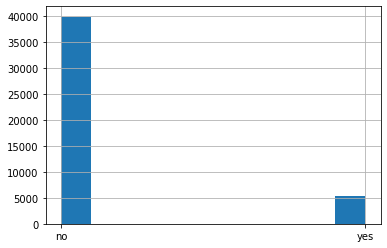

In [264]:
dataset['y'].hist()  # The data is imbalanced

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


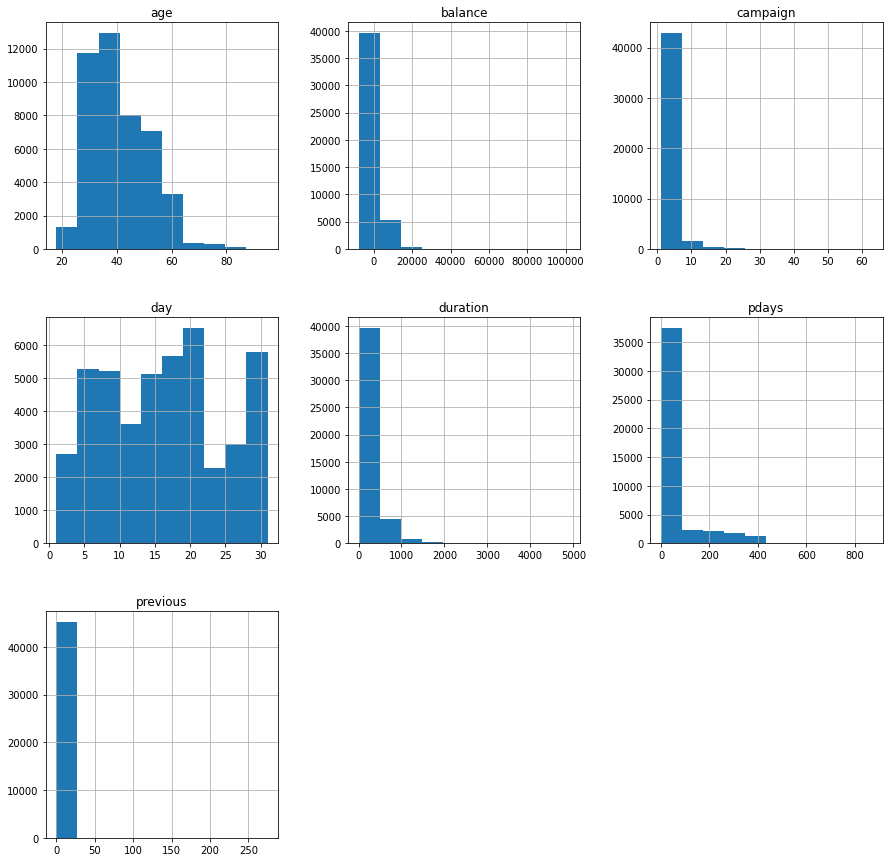

In [265]:
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()  # get current axis
dataset.hist(ax = ax)
plt.show()

## **The data isn't normalised, balanced and has categorial varibles to be taken care of**

##### **First we transform the columns with binary values, "yes" maps to 1 and "no" maps to 0**

In [266]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:, 4] = le.fit_transform(dataset.iloc[:, 4])  # default
dataset.iloc[:, 6] = le.fit_transform(dataset.iloc[:, 6])  # housing
dataset.iloc[:, 7] = le.fit_transform(dataset.iloc[:, 7])  # loan
dataset.iloc[:,-1] = le.fit_transform(dataset.iloc[:,-1])  # dependent variable

# dt['default'] = dt['default'].map({'yes': 1, 'no': 0})   manually doing it

#### **The columns that don't contribute to the analysis are removed**

*The columns contact, day, month in the dataset seem to be useless, so they are dropped from the dataset*

In [267]:
dataset.drop(["contact",	"day",	"month"	],1, inplace = True) # remove columns contact, day, month as they arent useful

##### **The categorical columns are transformed and dummy variables are created**

In [268]:
dummy = pd.get_dummies(dataset[["job", "marital", "education", "poutcome"]], drop_first=True)
dataset = pd.concat([dataset, dummy],axis=1)

In [269]:
dataset.drop(["job","marital", "education", "poutcome"], 1, inplace=True)

##### **Now the dataset has only numerical values**

In [270]:
dataset.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1


In [271]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   duration             45211 non-null  int64
 6   campaign             45211 non-null  int64
 7   pdays                45211 non-null  int64
 8   previous             45211 non-null  int64
 9   y                    45211 non-null  int64
 10  job_blue-collar      45211 non-null  uint8
 11  job_entrepreneur     45211 non-null  uint8
 12  job_housemaid        45211 non-null  uint8
 13  job_management       45211 non-null  uint8
 14  job_retired          45211 non-null  uint8
 15  job_self-employed    45211 non-null  uint8
 16  job_services         4

##### **Handling the outliers**


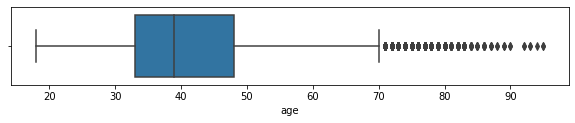

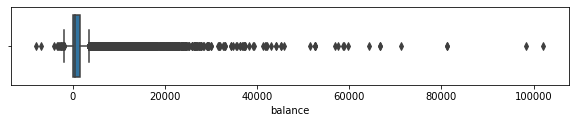

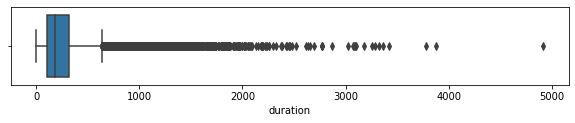

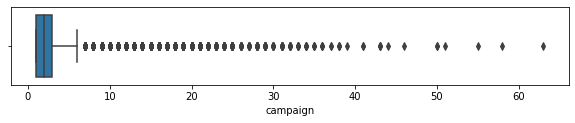

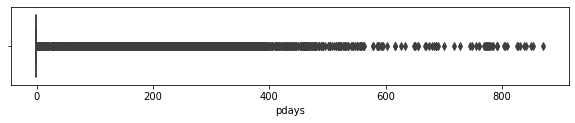

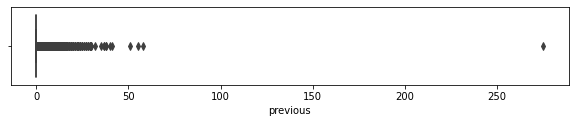

In [272]:
# View the outliers using boxplot

plt.figure(figsize=(10,10))
plt.subplot(6, 1, 1)
sns.boxplot(dataset["age"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(6, 1, 2)
sns.boxplot(dataset["balance"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(6, 1, 3)
sns.boxplot(dataset["duration"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(6, 1, 4)
sns.boxplot(dataset["campaign"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(6, 1, 5)
sns.boxplot(dataset["pdays"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(6, 1, 6)
sns.boxplot(dataset["previous"])
plt.show()

In [273]:
dataset.shape  # the dimensions before the outliers are taken care of

(45211, 29)

In [274]:
# Outlier handling 

from scipy import stats
z = np.abs(stats.zscore(dataset[['age','balance','duration','campaign','pdays','previous']]))
dataset = dataset[(z < 3).all(axis=1)]  # z < 3 are all the rows which aren't outliers (z> 3 will be the outliers rows)

In [275]:
dataset.shape   # the dimensions after handling the outliers

(40209, 29)

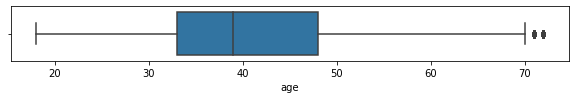

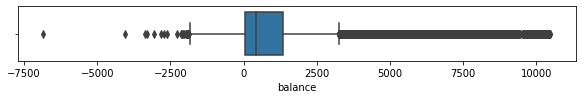

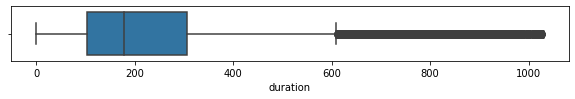

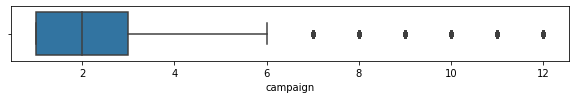

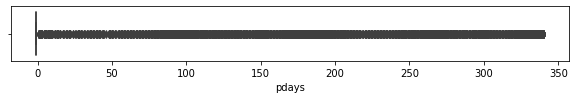

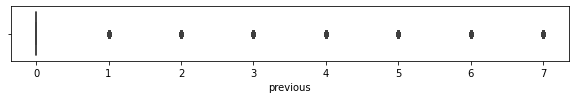

In [276]:
# View the outliers using boxplot

plt.figure(figsize=(10,7))
plt.subplot(6, 1, 1)
sns.boxplot(dataset["age"])
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(6, 1, 2)
sns.boxplot(dataset["balance"])
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(6, 1, 3)
sns.boxplot(dataset["duration"])
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(6, 1, 4)
sns.boxplot(dataset["campaign"])
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(6, 1, 5)
sns.boxplot(dataset["pdays"])
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(6, 1, 6)
sns.boxplot(dataset["previous"])
plt.show()

In [277]:
dataset.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1


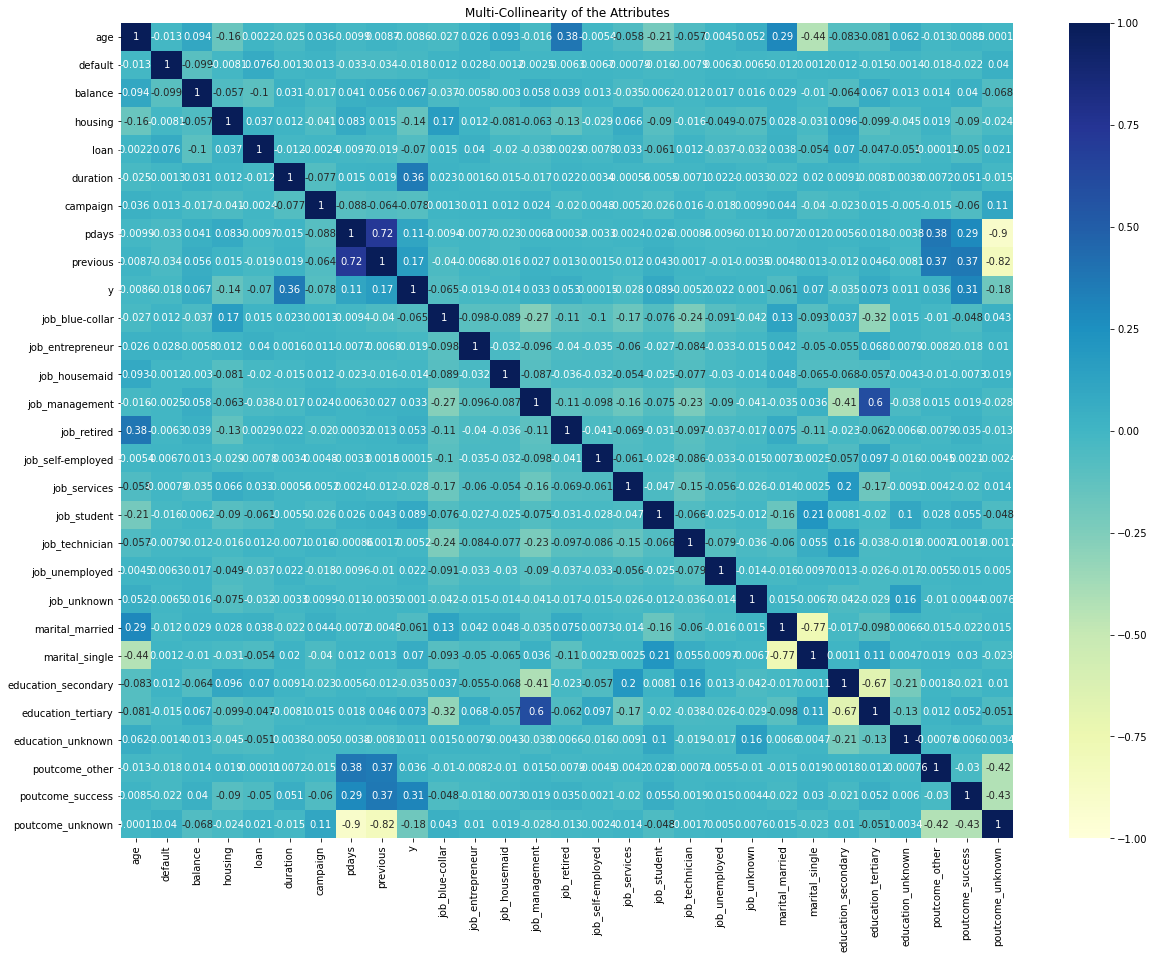

In [278]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(dataset.corr(),vmin=-1, vmax=1,annot=True,cmap="YlGnBu")
ax.set_title('Multi-Collinearity of the Attributes')
plt.show()

##### **We remove the irrelvent variables by checking their dependencies**

In [279]:
x = dataset.drop(["y"], axis = 1)
y = dataset["y"]

In [280]:
import statsmodels.api as sm

lor = sm.Logit(y,x).fit()
lor.summary()

Optimization terminated successfully.
         Current function value: 0.229606
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40181
Method:                           MLE   Df Model:                           27
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.2976
Time:                        18:59:02   Log-Likelihood:                -9232.2
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0216      0.002    -10.665      0.000      -0.026      -0.018
default                -0.1281      0.171     -0.747      0.455      -0.464       0.208
balance              5.277e-05   1.05e-05      5.035      0.000    3.22e-05    7.33e-05
housing                -1.0909      0.043    -25.486      0.000      -1.175      -1.007
loan                   -0.6612      0.065    -10.118      0.000      -0.789      -0.533
duration                0.0053   8.62e-05     61.421      0.000       0.005       0.005
campaign               -0.1573      0.013    -11.803      0.000      -0.183      -0.131
pdays                  -0.0053      0.000    -11.232      0.000      -0.006      -0.004
previous               -0.0094      0.023     -0.403      0.687      -0.055       0.036
job_blue-collar        -0.6503      0.075     -8.695      0.000      -0.797      -0.504
job_entrepreneur       -0.7449      0.136     -5.480      0.000      -1.011      -0.478
job_housemaid          -0.6774      0.142     -4.763      0.000      -0.956      -0.399
job_management         -0.4142      0.077     -5.407      0.000      -0.564      -0.264
job_retired             0.2855      0.106      2.682      0.007       0.077       0.494
job_self-employed      -0.6744      0.121     -5.565      0.000      -0.912      -0.437
job_services           -0.5234      0.089     -5.892      0.000      -0.697      -0.349
job_student             0.2666      0.111      2.396      0.017       0.049       0.485
job_technician         -0.4267      0.071     -5.988      0.000      -0.566      -0.287
job_unemployed         -0.4379      0.116     -3.760      0.000      -0.666      -0.210
job_unknown            -0.7354      0.258     -2.856      0.004      -1.240      -0.231
marital_married        -0.3766      0.059     -6.360      0.000      -0.493      -0.261
marital_single         -0.2329      0.064     -3.625      0.000      -0.359      -0.107
education_secondary    -0.0800      0.064     -1.244      0.214      -0.206       0.046
education_tertiary      0.2751      0.076      3.618      0.000       0.126       0.424
education_unknown       0.0325      0.111      0.292      0.770      -0.186       0.251
poutcome_other         -0.0265      0.108     -0.245      0.807      -0.238       0.185
poutcome_success        1.9717      0.089     22.270      0.000       1.798       2.145
poutcome_unknown       -1.8072      0.101    -17.930      0.000      -2.005      -1.610
=======================================================================================
"""

In [281]:
x.drop(["education_unknown", "poutcome_other"], axis=1, inplace=True)

In [282]:
lor = sm.Logit(y,x).fit()
lor.summary()

Optimization terminated successfully.
         Current function value: 0.229607
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40183
Method:                           MLE   Df Model:                           25
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.2976
Time:                        18:59:03   Log-Likelihood:                -9232.3
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0216      0.002    -10.868      0.000      -0.026      -0.018
default                -0.1277      0.171     -0.745      0.457      -0.464       0.208
balance              5.284e-05   1.05e-05      5.043      0.000    3.23e-05    7.34e-05
housing                -1.0909      0.043    -25.486      0.000      -1.175      -1.007
loan                   -0.6616      0.065    -10.125      0.000      -0.790      -0.533
duration                0.0053   8.61e-05     61.453      0.000       0.005       0.005
campaign               -0.1575      0.013    -11.822      0.000      -0.184      -0.131
pdays                  -0.0052      0.000    -11.265      0.000      -0.006      -0.004
previous               -0.0097      0.023     -0.417      0.677      -0.055       0.036
job_blue-collar        -0.6530      0.074     -8.776      0.000      -0.799      -0.507
job_entrepreneur       -0.7444      0.136     -5.478      0.000      -1.011      -0.478
job_housemaid          -0.6814      0.142     -4.806      0.000      -0.959      -0.404
job_management         -0.4137      0.076     -5.411      0.000      -0.564      -0.264
job_retired             0.2830      0.106      2.669      0.008       0.075       0.491
job_self-employed      -0.6742      0.121     -5.566      0.000      -0.912      -0.437
job_services           -0.5236      0.089     -5.898      0.000      -0.698      -0.350
job_student             0.2698      0.110      2.455      0.014       0.054       0.485
job_technician         -0.4263      0.071     -5.991      0.000      -0.566      -0.287
job_unemployed         -0.4393      0.116     -3.775      0.000      -0.667      -0.211
job_unknown            -0.7267      0.256     -2.842      0.004      -1.228      -0.225
marital_married        -0.3760      0.059     -6.374      0.000      -0.492      -0.260
marital_single         -0.2319      0.063     -3.652      0.000      -0.356      -0.107
education_secondary    -0.0895      0.057     -1.574      0.116      -0.201       0.022
education_tertiary      0.2648      0.069      3.861      0.000       0.130       0.399
poutcome_success        1.9799      0.084     23.654      0.000       1.816       2.144
poutcome_unknown       -1.7985      0.098    -18.410      0.000      -1.990      -1.607
=======================================================================================
"""

In [283]:
x.drop(["previous", "default"], axis=1, inplace=True)

In [284]:
lor = sm.Logit(y,x).fit()
lor.summary()

Optimization terminated successfully.
         Current function value: 0.229617
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40185
Method:                           MLE   Df Model:                           23
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.2976
Time:                        18:59:03   Log-Likelihood:                -9232.7
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0219      0.002    -11.453      0.000      -0.026      -0.018
balance              5.344e-05   1.04e-05      5.117      0.000     3.3e-05    7.39e-05
housing                -1.0916      0.043    -25.558      0.000      -1.175      -1.008
loan                   -0.6655      0.065    -10.212      0.000      -0.793      -0.538
duration                0.0053   8.61e-05     61.463      0.000       0.005       0.005
campaign               -0.1580      0.013    -11.895      0.000      -0.184      -0.132
pdays                  -0.0053      0.000    -11.388      0.000      -0.006      -0.004
job_blue-collar        -0.6566      0.074     -8.853      0.000      -0.802      -0.511
job_entrepreneur       -0.7498      0.136     -5.523      0.000      -1.016      -0.484
job_housemaid          -0.6837      0.142     -4.826      0.000      -0.961      -0.406
job_management         -0.4168      0.076     -5.461      0.000      -0.566      -0.267
job_retired             0.2835      0.106      2.675      0.007       0.076       0.491
job_self-employed      -0.6781      0.121     -5.605      0.000      -0.915      -0.441
job_services           -0.5257      0.089     -5.932      0.000      -0.699      -0.352
job_student             0.2652      0.109      2.428      0.015       0.051       0.479
job_technician         -0.4290      0.071     -6.042      0.000      -0.568      -0.290
job_unemployed         -0.4413      0.116     -3.794      0.000      -0.669      -0.213
job_unknown            -0.7291      0.256     -2.852      0.004      -1.230      -0.228
marital_married        -0.3785      0.058     -6.472      0.000      -0.493      -0.264
marital_single         -0.2361      0.063     -3.776      0.000      -0.359      -0.114
education_secondary    -0.0931      0.056     -1.653      0.098      -0.204       0.017
education_tertiary      0.2621      0.068      3.849      0.000       0.129       0.396
poutcome_success        1.9767      0.083     23.733      0.000       1.813       2.140
poutcome_unknown       -1.7820      0.087    -20.548      0.000      -1.952      -1.612
=======================================================================================
"""

In [285]:
x.drop(["education_secondary"], axis=1, inplace=True)

In [286]:
lor = sm.Logit(y,x).fit()
lor.summary()

Optimization terminated successfully.
         Current function value: 0.229650
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40186
Method:                           MLE   Df Model:                           22
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.2975
Time:                        18:59:04   Log-Likelihood:                -9234.0
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   -0.0225      0.002    -11.985      0.000      -0.026      -0.019
balance             5.332e-05   1.04e-05      5.104      0.000    3.28e-05    7.38e-05
housing               -1.0967      0.043    -25.751      0.000      -1.180      -1.013
loan                  -0.6721      0.065    -10.331      0.000      -0.800      -0.545
duration               0.0053   8.61e-05     61.429      0.000       0.005       0.005
campaign              -0.1588      0.013    -11.952      0.000      -0.185      -0.133
pdays                 -0.0054      0.000    -11.944      0.000      -0.006      -0.005
job_blue-collar       -0.6368      0.073     -8.716      0.000      -0.780      -0.494
job_entrepreneur      -0.7426      0.136     -5.474      0.000      -1.008      -0.477
job_housemaid         -0.6539      0.140     -4.655      0.000      -0.929      -0.379
job_management        -0.4129      0.076     -5.418      0.000      -0.562      -0.264
job_retired            0.3087      0.105      2.945      0.003       0.103       0.514
job_self-employed     -0.6759      0.121     -5.589      0.000      -0.913      -0.439
job_services          -0.5333      0.088     -6.031      0.000      -0.707      -0.360
job_student            0.2690      0.109      2.464      0.014       0.055       0.483
job_technician        -0.4373      0.071     -6.183      0.000      -0.576      -0.299
job_unemployed        -0.4351      0.116     -3.746      0.000      -0.663      -0.207
job_unknown           -0.6893      0.255     -2.703      0.007      -1.189      -0.189
marital_married       -0.3892      0.058     -6.713      0.000      -0.503      -0.276
marital_single        -0.2570      0.061     -4.202      0.000      -0.377      -0.137
education_tertiary     0.3318      0.054      6.182      0.000       0.227       0.437
poutcome_success       1.9634      0.083     23.687      0.000       1.801       2.126
poutcome_unknown      -1.8145      0.084    -21.523      0.000      -1.980      -1.649
======================================================================================
"""

##### **To balance the data, we use the undersampling technique- Near Miss**

In [287]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.under_sampling import NearMiss


u = NearMiss()
# summarize class distribution
counter_before = Counter(y)
print(counter_before)
# define the undersampling method

undersample = NearMiss(version=1, n_neighbors=5)
# transform the dataset
x, y = undersample.fit_resample(x, y)
# summarize the new class distribution
counter_after = Counter(y)
print(counter_after)


Counter({0: 36155, 1: 4054})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 4054, 1: 4054})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


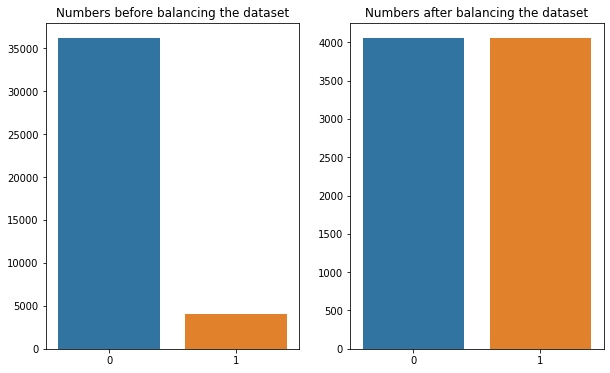

In [288]:
labels = [0, 1]
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.barplot(labels, list(counter_before.values()))
plt.title("Numbers before balancing the dataset")
plt.subplot(1, 2, 2)
sns.barplot(labels, list(counter_after.values()))
plt.title("Numbers after balancing the dataset")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


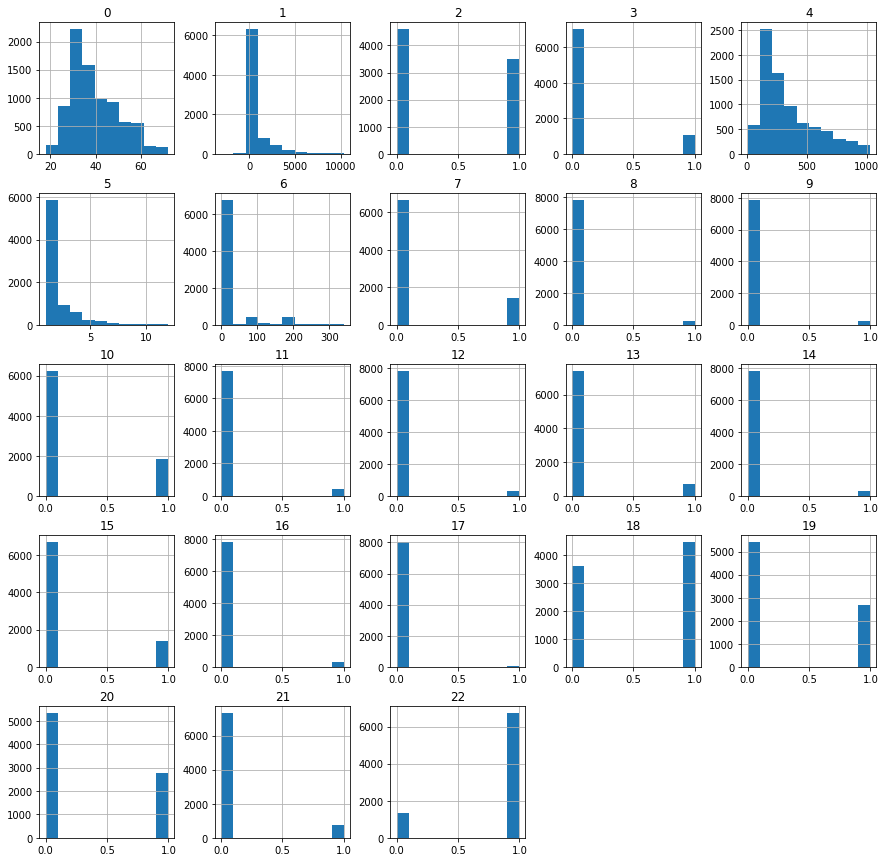

In [289]:
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()  # get current axis
pd.DataFrame(x).hist(ax = ax)
plt.show()

**The data is cleaned and now ready to actually work with**

## **We will try to fit the dataset with three classification process- Logistic Regression, RandomForest Classification and the Naive Bayes Classification. The one which gives gives the best results will be preferred for the given dataset**

# **1. Logistic Regression**

##### **Splitting the dataset**

In [290]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

##### **Scaling the dataset**

In [291]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##### **Fitting the model**

In [292]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### **Predicting the test set**

In [293]:
y_pred = classifier.predict(x_test)

### **Metric results**

In [294]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Confusion matrix:
 [[922  71]
 [130 904]]
Accuracy: 0.900838677849038
Recall: 0.874274661508704
Precision: 0.9271794871794872


# **2. Random Forest Classification**

##### **Splitting the dataset**

In [295]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

##### **Scaling the dataset**

In [296]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##### **Fitting the model**

In [297]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##### **Predicting the test set**

In [298]:
y_pred = classifier.predict(x_test)

### **Metric results**

In [299]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Confusion matrix:
 [[932  61]
 [109 925]]
Accuracy: 0.9161322150962012
Recall: 0.8945841392649904
Precision: 0.9381338742393509


# **3. Naive Bayes Classification**

##### **Splitting the dataset**

In [300]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

##### **Scaling the dataset**

In [301]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##### **Fitting the model**

In [302]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##### **Predicting the test set**

In [303]:
y_pred = classifier.predict(x_test)

### **Metric results**

In [304]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Confusion matrix:
 [[976  17]
 [323 711]]
Accuracy: 0.8322644301924026
Recall: 0.6876208897485493
Precision: 0.9766483516483516


### **After trying three different classification approaches we realise that the Random Forest Classification gives better accuracy, precision and recall; compared to Logistic Regrssion and Naive Bayes Classification.**

**Hence, for the given dataset the best approach will be Random Forest Classification.**